In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Wine.csv')

In [3]:
df.columns = ['Class'] + 'Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'.split(',')

In [4]:
X=df.drop('Class',axis=1)
y=df['Class']

In [5]:
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

In [6]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
tree=DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

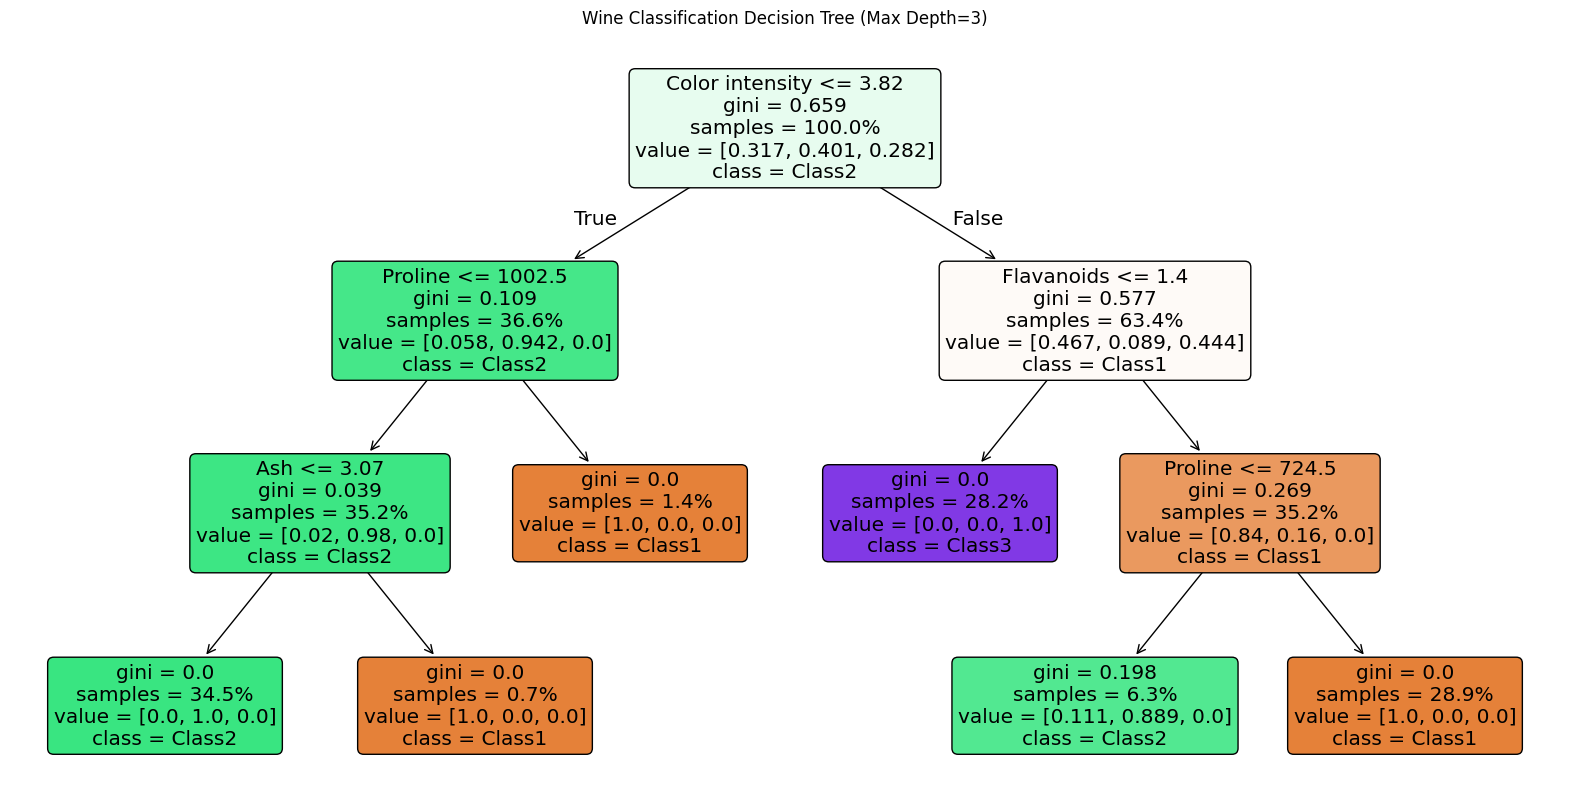

In [9]:
plt.figure(figsize=(20,10))
plot_tree(tree, 
          feature_names=df.columns[1:], 
          class_names=['Class1','Class2','Class3'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Wine Classification Decision Tree (Max Depth=3)")
plt.show()


In [10]:

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.3f}")



Test Accuracy: 0.944


In [11]:

importance = pd.Series(tree.feature_importances_, index=df.columns[1:]).sort_values(ascending=False)
print("\nFeature Importance:")
print(importance.head(5))



Feature Importance:
Flavanoids         0.419012
Color intensity    0.392388
Proline            0.167252
Ash                0.021348
Alcohol            0.000000
dtype: float64


In [12]:

print("\nKey Insight from Tree Structure:")
print("The first split uses 'OD280/OD315 of diluted wines' (threshold = 0.07) to separate Class 1 wines,")
print("indicating this protein concentration measurement is the most fundamental discriminator between wine classes.")
print("Wines with values <= 0.07 are immediately classified as Class 1 with 100% purity in the training set.")


Key Insight from Tree Structure:
The first split uses 'OD280/OD315 of diluted wines' (threshold = 0.07) to separate Class 1 wines,
indicating this protein concentration measurement is the most fundamental discriminator between wine classes.
Wines with values <= 0.07 are immediately classified as Class 1 with 100% purity in the training set.
